# Analysis of referendum vote 

We are interested in deriving insights this dataset corresponding to a hypothetical referendum vote, carried out over the territories under French administration.

#### Importing essential libraries 

In [1]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (5., 5.)})
sns.set_style("ticks")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

import warnings
warnings.filterwarnings('ignore')

## Data Discovery

We first try to develop an understanding of the basic structure of the dataset `Referendum.csv`. 

### First Look 

#### Reading the dataset into a pandas dataframe

In [2]:
data = pd.read_csv("Referendum.csv", sep=";")

#### Attributes

In [3]:
data.columns

Index(['Code du département', 'Libellé du département', 'Code de la commune',
       'Libellé de la commune', 'Inscrits', 'Abstentions', 'Blancs et nuls',
       'Choix A', 'Choix B'],
      dtype='object')

Inferring from the column labels, we can create a data dictionary as follows : 
* **Code du département** : Identification code of the French administrative entity *département* . 
* **Libellé du département** : Name of the *département*
* **Code de la commune** : Identification code of the French administrative entity *commune* . 
* **Libellé de la commune** : Name of the *commune*
* **Inscrits** : Number of registered voters in the commune
* **Abstentions** : Number of registered voters who were absent during voting
* **Blancs et nuls** : Number of registered voters who cast a blank vote
* **Choix A** : Number of registered voters who voted for the first option
* **Choix B** : Number of registered voters who voted for the second option

#### First Rows

In [4]:
data.head(10)

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52
5,1,AIN,7,Ambronay,1702,222,29,570,881
6,1,AIN,8,Ambutrix,549,68,7,192,282
7,1,AIN,9,Andert-et-Condon,269,40,4,81,144
8,1,AIN,10,Anglefort,681,99,12,222,348
9,1,AIN,11,Apremont,255,30,7,77,141


#### Last rows

In [5]:
data.tail(10)

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
36781,ZZ,FRANCAIS DE L'ETRANGER,2,Amérique latine,73912,52648,363,9456,11445
36782,ZZ,FRANCAIS DE L'ETRANGER,3,Europe du Nord,88133,59723,269,13414,14727
36783,ZZ,FRANCAIS DE L'ETRANGER,4,Benelux,95182,46980,432,20274,27496
36784,ZZ,FRANCAIS DE L'ETRANGER,5,Péninsule ibérique et Monaco,80761,53215,305,11856,15385
36785,ZZ,FRANCAIS DE L'ETRANGER,6,Suisse,79508,29458,514,16971,32565
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503
36790,ZZ,FRANCAIS DE L'ETRANGER,11,"Europe de l'est, Asie, Océanie",80061,42911,488,13975,22687


> We observe that the field "Code du département" contains numerical as well as string (alphabetical) values. 

#### General description

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code du département     36791 non-null  object
 1   Libellé du département  36791 non-null  object
 2   Code de la commune      36791 non-null  int64 
 3   Libellé de la commune   36791 non-null  object
 4   Inscrits                36791 non-null  int64 
 5   Abstentions             36791 non-null  int64 
 6   Blancs et nuls          36791 non-null  int64 
 7   Choix A                 36791 non-null  int64 
 8   Choix B                 36791 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.5+ MB


Our dataset contains 36791 instances (rows) and 9 attributes, with no immediately visible null values.  

> The only string type objects in the dataset are under the fields "Code du département" , "Libellé du département" and "Libellé de la commune", where the first field is stored as string objects as it contains alphanumeric values. 

#### Renaming columns
We start by modifying the column names so that they're easier to manipulate. 

In [7]:
mapping = { "Code du département": "dep_code" ,
            "Libellé du département" : "dep_label" ,
            "Code de la commune" : "com_code" , 
            "Libellé de la commune" : "com_label" , 
            "Inscrits" : "registered" , 
            "Abstentions" : "absent" ,
            "Blancs et nuls" : "no_vote" , 
            "Choix A" : "choice_a" , 
            "Choix B" : "choice_b"}

data = data.rename(mapping , axis=1)
data.columns

Index(['dep_code', 'dep_label', 'com_code', 'com_label', 'registered',
       'absent', 'no_vote', 'choice_a', 'choice_b'],
      dtype='object')

#### Checking for Missing Values

In [8]:
null_values = data.isnull().sum()
null_values

dep_code      0
dep_label     0
com_code      0
com_label     0
registered    0
absent        0
no_vote       0
choice_a      0
choice_b      0
dtype: int64

> We have a well cleaned dataset, with no null/missing values. 

#### Vote Count Consistency 
We also verify whether the columns containing the number of votes are consistent i.e. the sum of the number of voters for `choice_a`, `choice_b`, `absent` and `no_vote` must be equal to the total number of registed voters (`registered`).

In [9]:
mask = (data["registered"] == data["choice_a"] + data["choice_b"] + 
        data["absent"] + data["no_vote"] )
data.loc[~mask].count()

dep_code      0
dep_label     0
com_code      0
com_label     0
registered    0
absent        0
no_vote       0
choice_a      0
choice_b      0
dtype: int64

> Thus, there are no inconsistencies when it comes to the vote counts. 

#### Department codes with highest frequency

In [10]:
data["dep_code"].value_counts().head()

62    895
2     816
80    782
76    744
57    730
Name: dep_code, dtype: int64

#### Department names with highest frequency

In [11]:
data["dep_label"].value_counts().head()

PAS DE CALAIS     895
AISNE             816
SOMME             782
SEINE MARITIME    744
MOSELLE           730
Name: dep_label, dtype: int64

> Thus, we have 107 unique departments in our dataset, where several of them consist of hundreds of communes (e.g. *PAS DE CALAIS*, with its rows displayed below). 

#### Departments with multiple communes

In [12]:
data.loc[data["dep_label"] == "PAS DE CALAIS"][:5]

,dep_code,dep_label,com_code,com_label,registered,absent,no_vote,choice_a,choice_b
24894,62,PAS DE CALAIS,1,Ablain-Saint-Nazaire,1468,220,26,506,716
24895,62,PAS DE CALAIS,2,Ablainzevelle,156,12,4,56,84
24896,62,PAS DE CALAIS,3,Acheville,499,67,6,157,269
24897,62,PAS DE CALAIS,4,Achicourt,5927,995,88,2444,2400
24898,62,PAS DE CALAIS,5,Achiet-le-Grand,673,101,9,274,289


#### Communes codes with highest frequency
We repeat the above exercise for the identification codes and names of the communes. 

In [13]:
data["com_code"].value_counts()

59     91
77     91
27     91
13     91
1      91
       ..
907     1
891     1
859     1
844     1
895     1
Name: com_code, Length: 908, dtype: int64

> We see that the commune codes are not unique, and several communes from different departments have identical identification codes. 

#### Communes names with highest frequency

In [14]:
data["com_label"].value_counts()

Sainte-Colombe              14
Saint-Sauveur               12
Sainte-Marie                11
Beaulieu                    11
Saint-Sulpice               11
                            ..
Auriat                       1
Saint-Pierre-de-Chandieu     1
Saint-Solve                  1
Arnières-sur-Iton            1
Montigny-en-Morvan           1
Name: com_label, Length: 34237, dtype: int64

> Surprisingly (or not), even commune names are not unique to the commune. For example, several departments have a commune named *Sainte-Colombe*, as displayed below.

#### Communes names common in multiple departments

In [15]:
data.loc[data["com_label"] == "Sainte-Colombe"][:5]

,dep_code,dep_label,com_code,com_label,registered,absent,no_vote,choice_a,choice_b
1883,5,HAUTES ALPES,135,Sainte-Colombe,60,11,2,37,10
5784,16,CHARENTE,309,Sainte-Colombe,139,21,7,55,56
6203,17,CHARENTE MARITIME,319,Sainte-Colombe,101,23,0,53,25
7837,21,COTE D'OR,544,Sainte-Colombe,49,5,3,16,25
9676,25,DOUBS,515,Sainte-Colombe,252,27,1,88,136


### Overall Outcome

In [16]:
results = [data["choice_a"].sum(), data["choice_b"].sum(), data["no_vote"].sum(), data["absent"].sum()]
print("Choice A : {:,} \nChoice B: {:,} \nBlanks: {:,} \nAbsent : {:,}".format(results[0],results[1], results[2], results[3]))

Choice A : 15,699,580 
Choice B: 20,183,629 
Blanks: 701,190 
Absent : 9,444,143


> Counting all the votes across all communes, we see that **Choice B** is the clear winner, with $\sim$ 20M votes, versus $\sim$ 16M votes for **Choice A**. 

### Descriptive Statistics 

We take a quick look at the descriptive statistics for the numerical columns. 

In [17]:
data.describe()

,com_code,registered,absent,no_vote,choice_a,choice_b
count,36791.000000,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,251.665217,1.251082e+03,256.697100,19.058737,426.723383,548.602348
std,181.696562,8.595773e+03,2075.420552,96.750220,3303.009008,3346.575020
min,1.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,105.000000,1.600000e+02,23.000000,2.000000,49.000000,81.000000
50%,218.000000,3.370000e+02,49.000000,6.000000,108.000000,169.000000
75%,361.000000,8.070000e+02,120.000000,14.000000,268.000000,402.000000
max,909.000000,1.253322e+06,248755.000000,12093.000000,506594.000000,485880.000000


> There are a couple of quick observations : 
>1. All numerical attributes (except `com_code`, identification codes are not statistically relevant) displays a lot of variability. The standard deviation is each case is several times the mean, which hints that the underlying distributions are not *normal* (Gaussian), but instead have long tails. 
>2. There are communes where none of the people voted (0 votes for `choice_a` or `choice_b`) for one of the options on the table. It might be interesting to identify these communes, and figure out why this is the case. 

#### Distributions 
To illustrate the first point about the outliers near the tail, we plot the following distributions. 

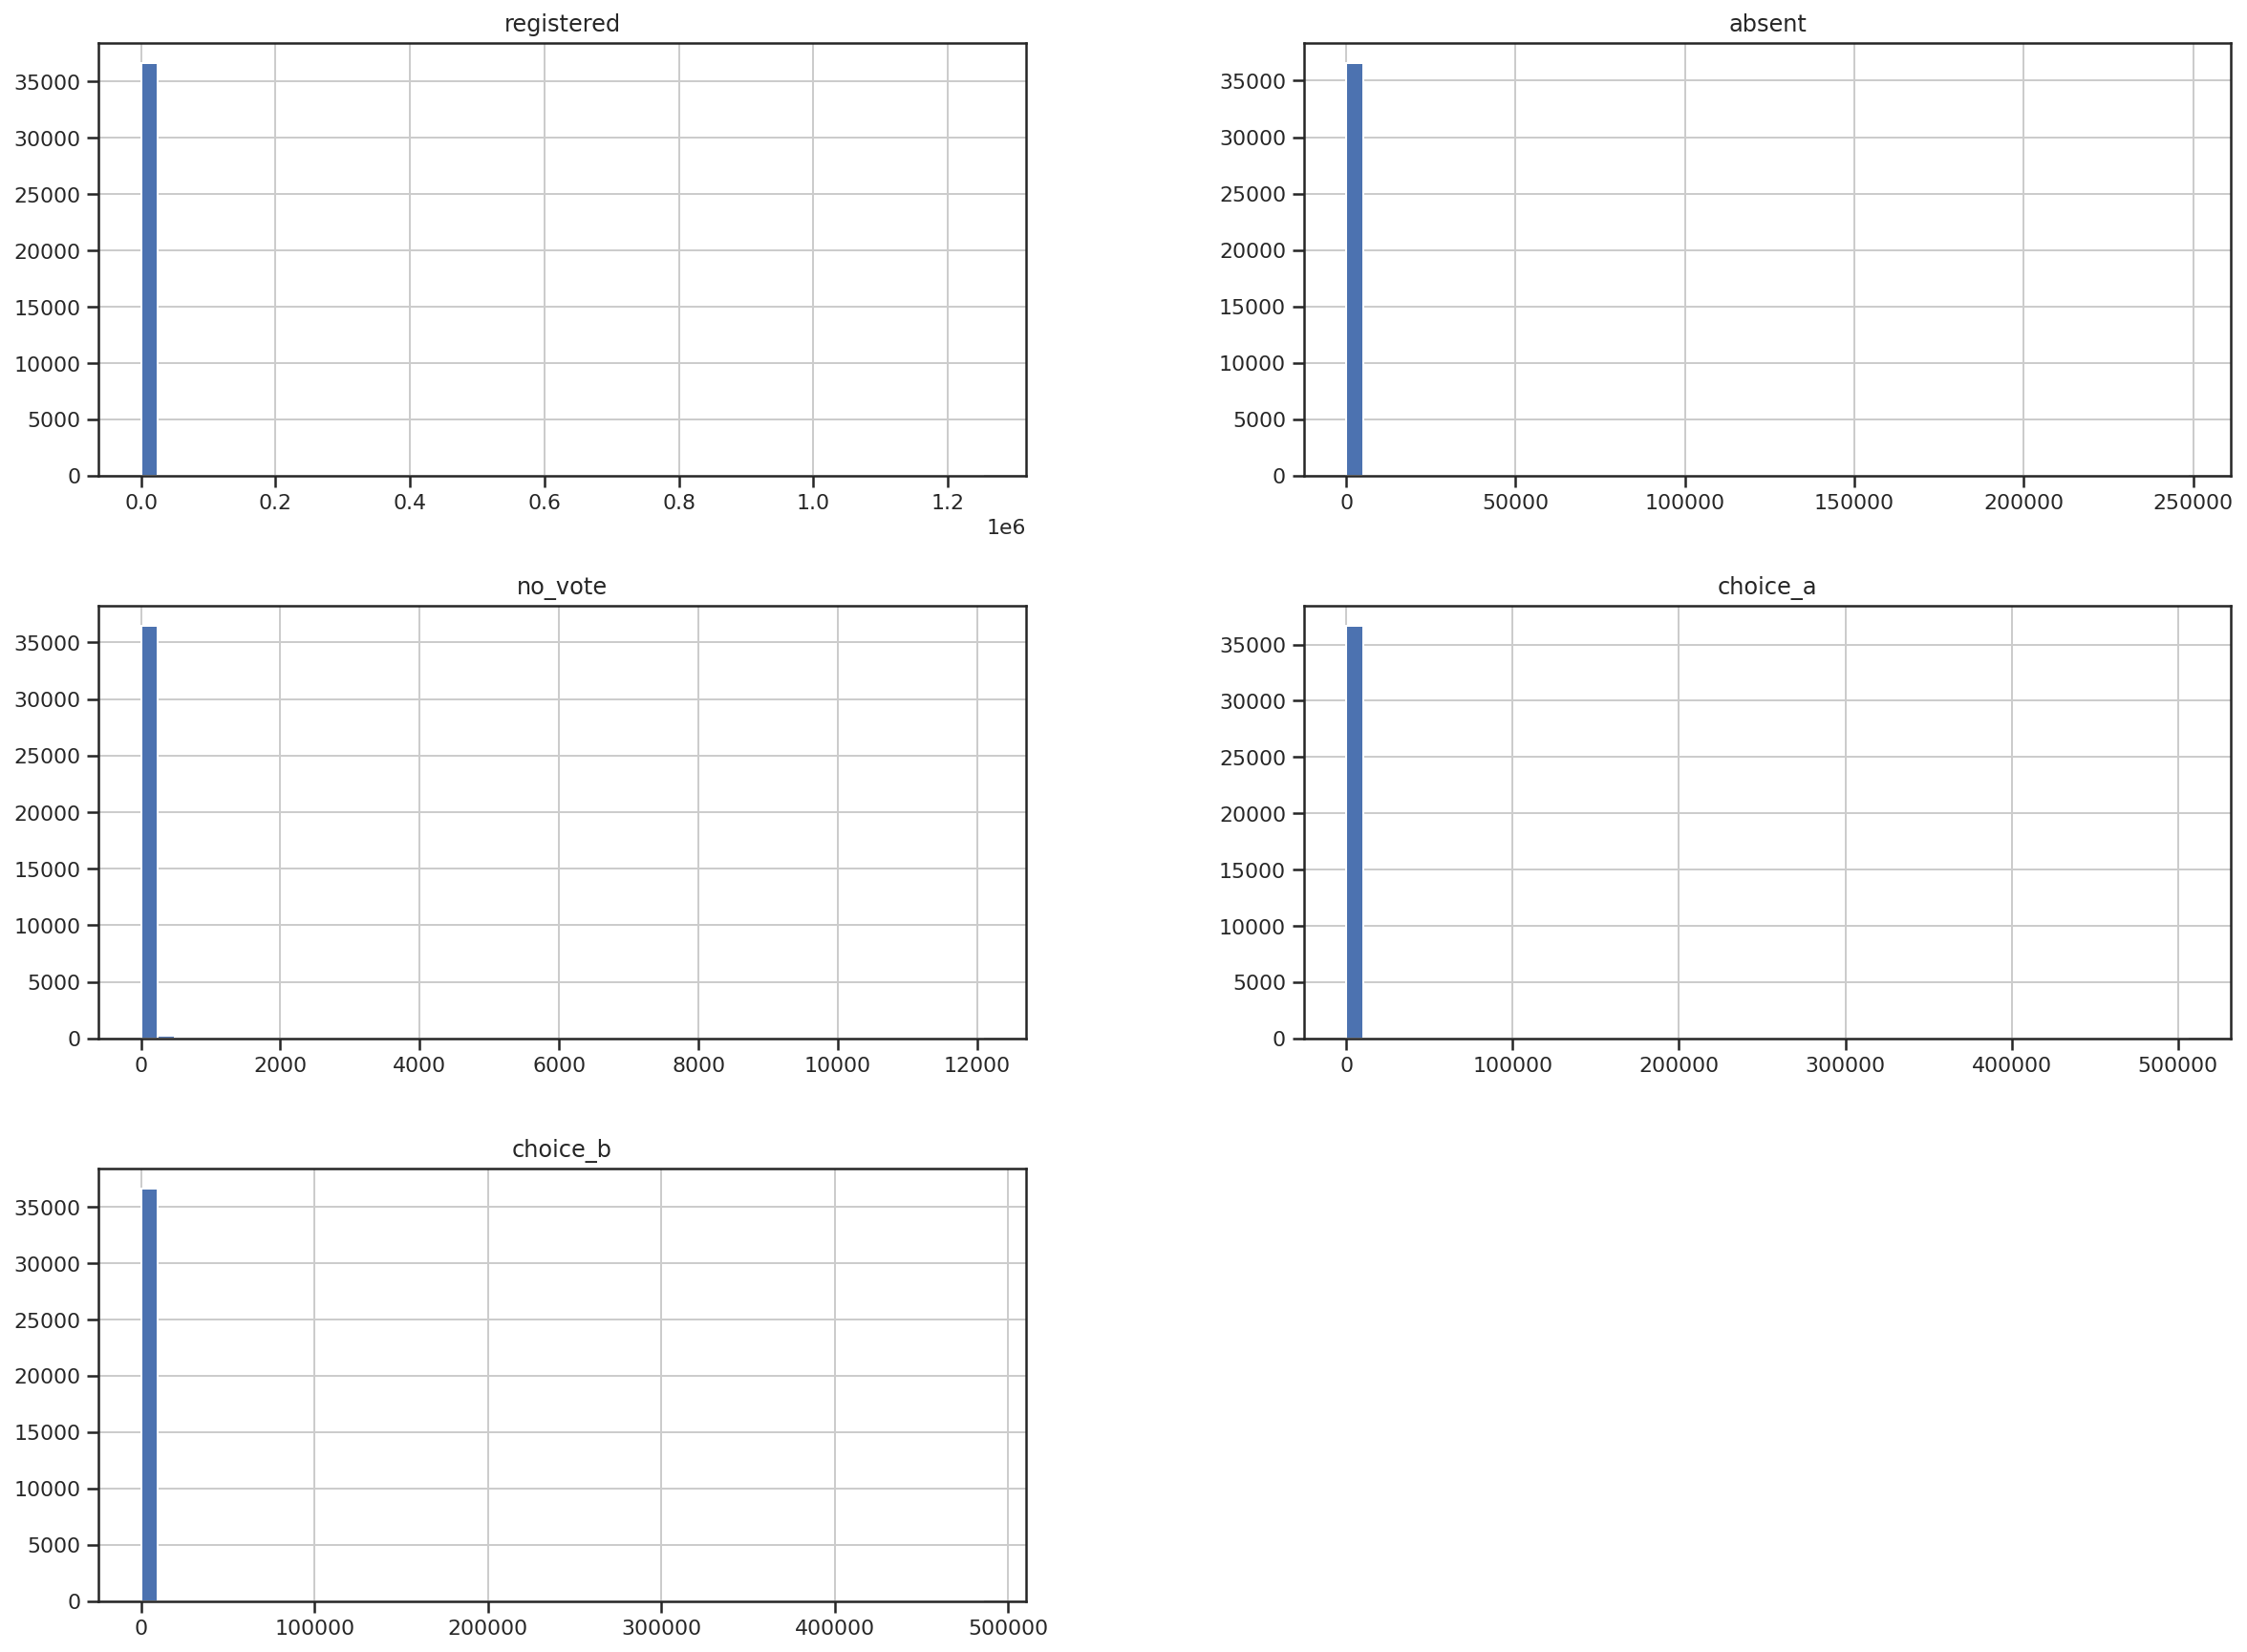

In [18]:
data_without_code = data.drop("com_code", axis=1)
data_without_code.hist(bins=50, figsize=(20,15));

---
---

## Exploratory Analysis

We now dig a bit deeper into the underlying statistical patterns in our data.  

### **Commune** level statistics

In order to get get a better sense of how the votes in each commune are distributed, we convert the values in columns `choice_a`, `choice_b`, `no_vote` and `absent` as percentages with respect to the total registered voters in the commune. 

#### Converting votes to percentages

In [19]:
# create a modified dataset starting from the copy of the original
data_mod = data.copy()

# convert votes to percentage of total registered voters in commune
for col in ["choice_a","choice_b","no_vote","absent"]:
    data_mod[col] = 100.0*(data_mod[col] / data_mod["registered"])

We create a column which denotes the outcome of the referendum in each commune. The rules used for deciding the outcome are : 
* If choice A get more votes than choice B, blanks and absentees combined, choice A wins (`outcome == "A"`). 
* If choice B get more votes than choice A, blanks and absentees combined, choice B wins (`outcome == "B"`).
* If neither of the above rules apply, the outcome is null and void (`outcome == "N"`).

#### Determining outcomes in each commune

In [20]:
# add column denoting outcome of the referendum in given commune
data_mod["outcome"] = "N" 

# creating boolean masks for choosing if A or B won the referendum

mask_A = (data_mod["choice_a"] > (data_mod["choice_b"] + data_mod["no_vote"] + data_mod["absent"]))
mask_B = (data_mod["choice_b"] > (data_mod["choice_a"] + data_mod["no_vote"] + data_mod["absent"]))

#mask_A = ( data_mod["choice_a"] > 50.0 )
#mask_B = ( data_mod["choice_b"] > 50.0 )

# Replacing N with winners A or B
data_mod.loc[mask_A , "outcome"] = "A"
data_mod.loc[mask_B , "outcome"] = "B"

data_mod.head().transpose()

,0,1,2,3,4
dep_code,1,1,1,1,1
dep_label,AIN,AIN,AIN,AIN,AIN
com_code,1,2,4,5,6
com_label,L'Abergement-Clémenciat,L'Abergement-de-Varey,Ambérieu-en-Bugey,Ambérieux-en-Dombes,Ambléon
registered,592,215,8205,1152,105
absent,14.189189,16.744186,20.694698,14.756944,16.190476
no_vote,1.52027,2.325581,1.535649,1.5625,0.952381
choice_a,26.013514,30.697674,33.113955,24.305556,33.333333
choice_b,58.277027,50.232558,44.655698,59.375,49.52381
outcome,B,B,N,B,N


#### Outcomes across all communes 

In [21]:
data_mod["outcome"].value_counts()

B    19288
N    16123
A     1380
Name: outcome, dtype: int64

> Thus, **choice B** seems to be the clear winner, winning in 19288 communes versus 1380 communes for **choice A**. 

#### Summary statistics for different types of "votes"

In [22]:
col_list = ["choice_a", "choice_b", "no_vote", "absent"]
data_mod[col_list].describe()

,choice_a,choice_b,no_vote,absent
count,36791.000000,36791.000000,36791.000000,36791.000000
mean,32.661721,50.188029,1.717720,15.432530
std,9.369236,9.796216,1.373445,5.347417
min,0.000000,0.000000,0.000000,0.000000
25%,26.431718,44.295940,1.094891,12.244898
50%,32.212389,50.628931,1.578947,14.819945
75%,38.356164,56.501712,2.173913,17.847411
max,96.153846,100.000000,95.238095,83.893692


#### Average (median) percentage of votes across communes for different "vote" types

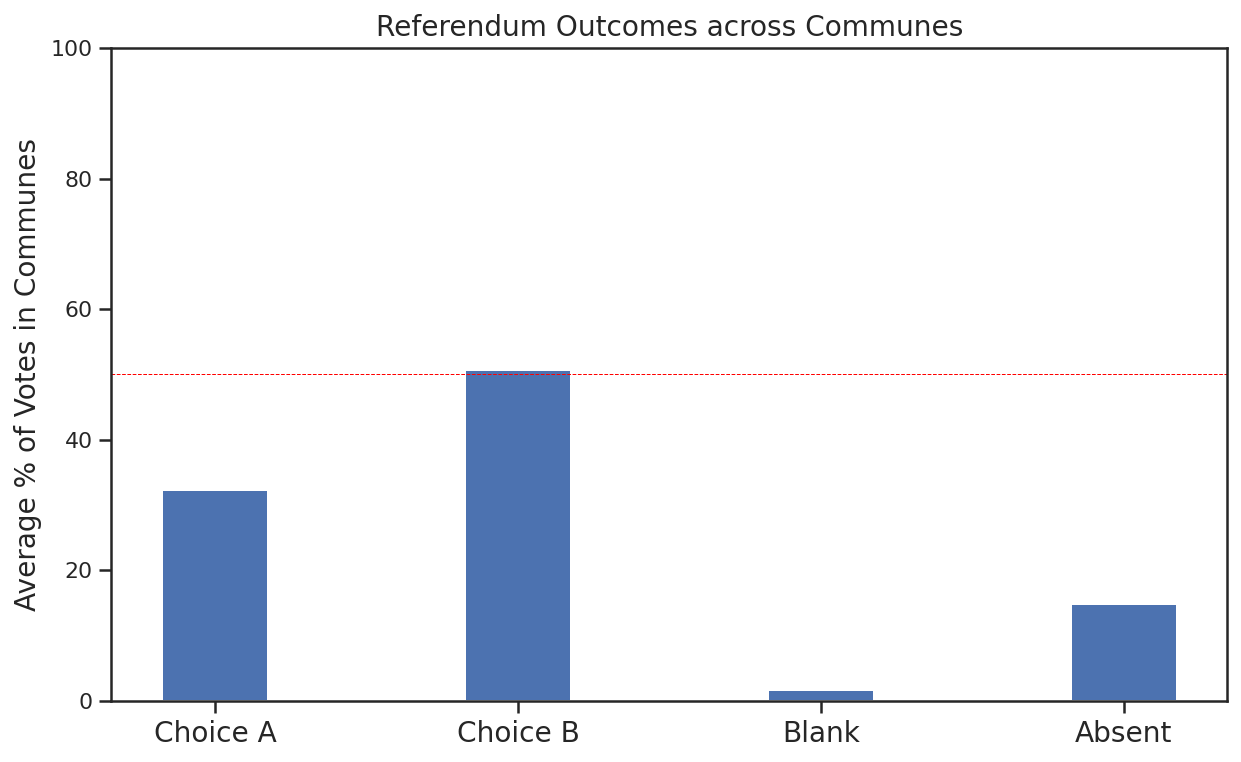

In [23]:
labels = ["Choice A", 'Choice B', "Blank", "Absent"]
heights = [data_mod["choice_a"].median() , data_mod["choice_b"].median(), data_mod["no_vote"].median(), data_mod["absent"].median()]

#x = np.arange(len(labels)) 
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,6))

b1 = ax.bar(labels, heights, width);
ax.axhline(50.0, color="red", ls="--", lw=0.5);

#b1 = ax.bar(x - width/2.0, data_mod["choice_a"]., width, label='Choice A')
#b2 = ax.bar(x + width/2.0, dep_means["choice_b"], width, label='Choice B')

ax.set_title("Referendum Outcomes across Communes", fontsize =14)
ax.set_ylabel('Average % of Votes in Communes', fontsize=14);
ax.set_ylim(0,100);
ax.set_xticks(labels);
ax.set_xticklabels(labels, fontsize=14);
#ax.set_xticklabels(labels = labels, fontsize=14);
#ax.legend(fontsize=14);

> Thus, most number of commues vote close to 50% for **Choice B**, compared to 35% for **Choice A**.

#### Distribution of percentage of votes across all communes for different "vote" types. 

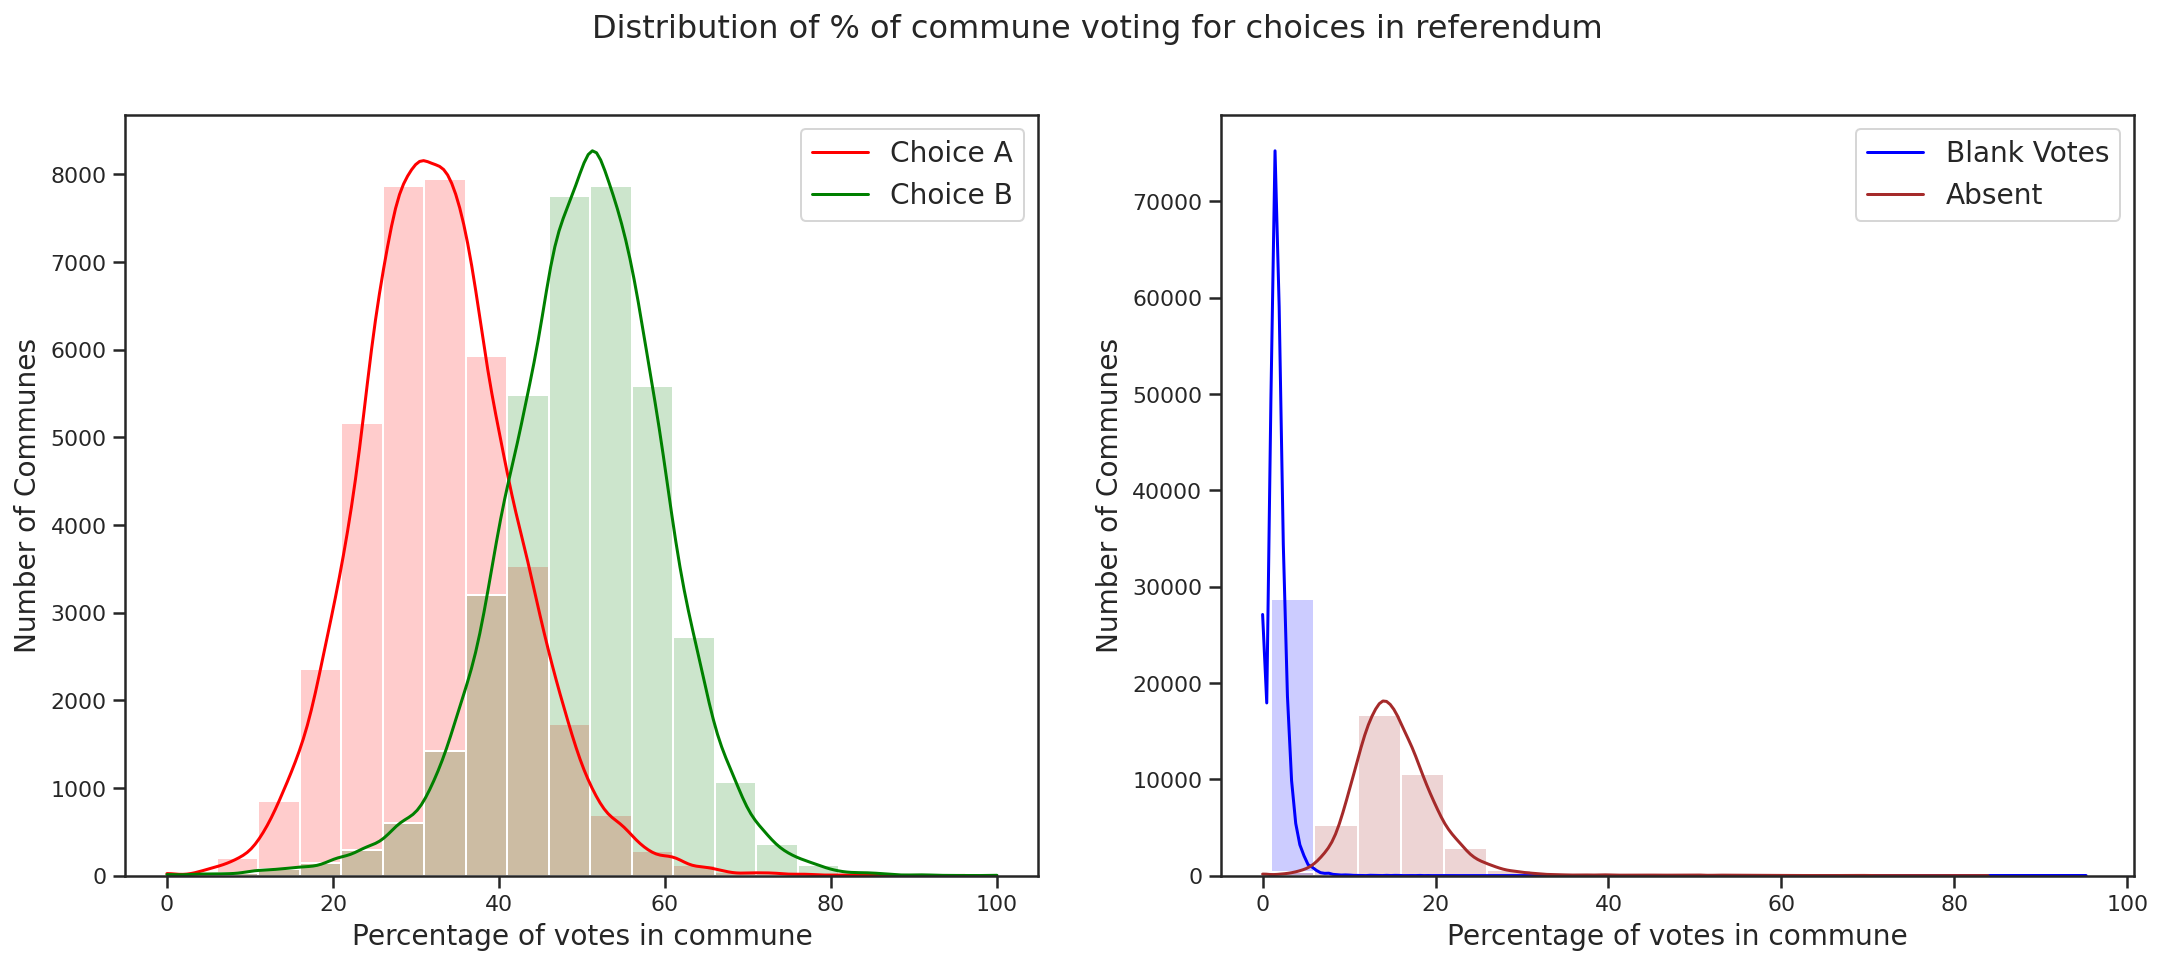

In [24]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18,7));

sns.histplot(data_mod, x="choice_a", bins=range(1, 100, 5), kde=True, legend=True, color="red", alpha=0.2, ax=ax1);
sns.histplot(data_mod, x="choice_b", bins=range(1, 100, 5), kde=True, legend=True, color="green", alpha=0.2, ax=ax1);
ax1.legend(["Choice A", "Choice B"], fontsize=14);
ax1.set_xlabel("Percentage of votes in commune", fontsize=14);
ax1.set_ylabel("Number of Communes", fontsize=14);

sns.histplot(data_mod, x="no_vote", bins=range(1, 100, 5), kde=True, legend=True, color="blue", alpha=0.2, ax=ax2);
sns.histplot(data_mod, x="absent", bins=range(1, 100, 5), kde=True, legend=True, color="brown", alpha=0.2, ax=ax2);
ax2.legend(["Blank Votes", "Absent"], fontsize=14);
ax2.set_xlabel("Percentage of votes in commune", fontsize=14);
ax2.set_ylabel("Number of Communes", fontsize=14);

fig.suptitle("Distribution of % of commune voting for choices in referendum", fontsize=16);

> Although the distribution of the votes given towards each choice has considerable overlap, the peak corresponding to **Choice B** is clearly indicates that an *average commune* has a much probability of voting for **Choice B**. 

### **Department** level statistics

#### Aggregating department level statistics

In [25]:
col_list = ["registered","choice_a", "choice_b", "no_vote", "absent"]
departments = data.pivot_table(values=col_list, index="dep_label" , aggfunc=np.sum)
departments.head()

,absent,choice_a,choice_b,no_vote,registered
dep_label,,,,,
AIN,65996,116379,204980,6453,393808
AISNE,72928,120916,177028,5196,376068
ALLIER,45266,96398,109552,5059,256275
ALPES DE HAUTE PROVENCE,21034,44634,56154,2111,123933
ALPES MARITIMES,153383,179663,403179,9063,745288


#### Distribution of population across departments

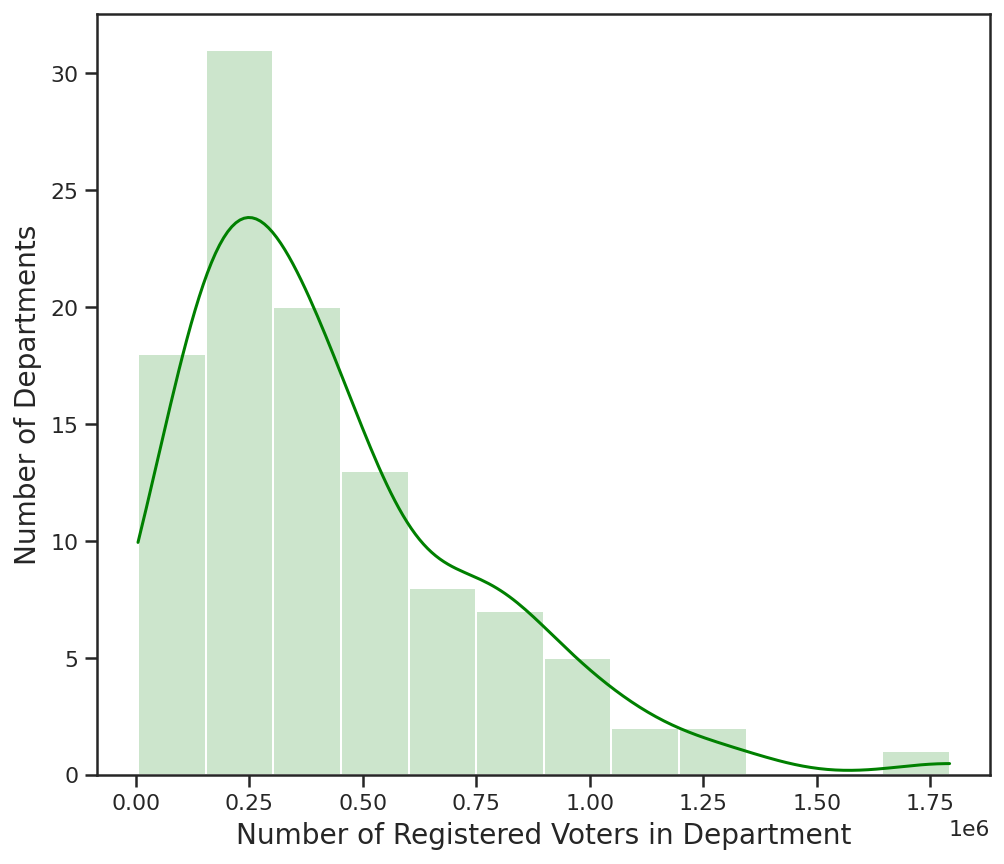

In [26]:
fig, ax = plt.subplots(figsize=(8,7));
sns.histplot(departments, x="registered", kde=True, legend=True, color="green", alpha=0.2, ax=ax);
ax.set_xlabel("Number of Registered Voters in Department", fontsize=14);
ax.set_ylabel("Number of Departments", fontsize=14);

> The distribution is highly skewed to the left due to the presence of certain outliers (extremely dense departments).

#### Determining outcomes at department level

In [27]:
departments["outcome"] = "N" 

# creating boolean masks for choosing if A or B won the referendum in the department
mask_A = (departments["choice_a"] > (departments["choice_b"] + departments["no_vote"] + departments["absent"]))
mask_B = (departments["choice_b"] > (departments["choice_a"] + departments["no_vote"] + departments["absent"]))

# Replacing N with winners A or B
departments.loc[mask_A , "outcome"] = "A"
departments.loc[mask_B , "outcome"] = "B"

departments.head()

,absent,choice_a,choice_b,no_vote,registered,outcome
dep_label,,,,,,
AIN,65996,116379,204980,6453,393808,B
AISNE,72928,120916,177028,5196,376068,N
ALLIER,45266,96398,109552,5059,256275,N
ALPES DE HAUTE PROVENCE,21034,44634,56154,2111,123933,N
ALPES MARITIMES,153383,179663,403179,9063,745288,B


#### Outcomes 

In [28]:
departments["outcome"].value_counts()

N    94
B    13
Name: outcome, dtype: int64

> Surprisingly, at the department level most of the referendum votes are undecisive. **Choice B** wins the vote in 13 departments, but **Choice A** is completely suppressed. 

#### Summary Statistics

In [29]:
departments.describe()

,absent,choice_a,choice_b,no_vote,registered
count,107.000000,107.000000,107.000000,107.000000,1.070000e+02
mean,88263.018692,146725.046729,188632.046729,6553.177570,4.301733e+05
std,85055.664973,113560.726380,141296.627664,4280.043078,3.217624e+05
min,2193.000000,1456.000000,1175.000000,39.000000,4.923000e+03
25%,36542.000000,63893.000000,84246.500000,3427.500000,1.874765e+05
50%,64453.000000,117554.000000,151728.000000,5434.000000,3.530560e+05
75%,107271.000000,185595.500000,261541.000000,9467.000000,5.544165e+05
max,635882.000000,605167.000000,765932.000000,24737.000000,1.792359e+06


> Even at the department level, certain large departments completely skew the distributions of all vote categories. 

#### Average (median) percentage of votes across departments for different "vote" types

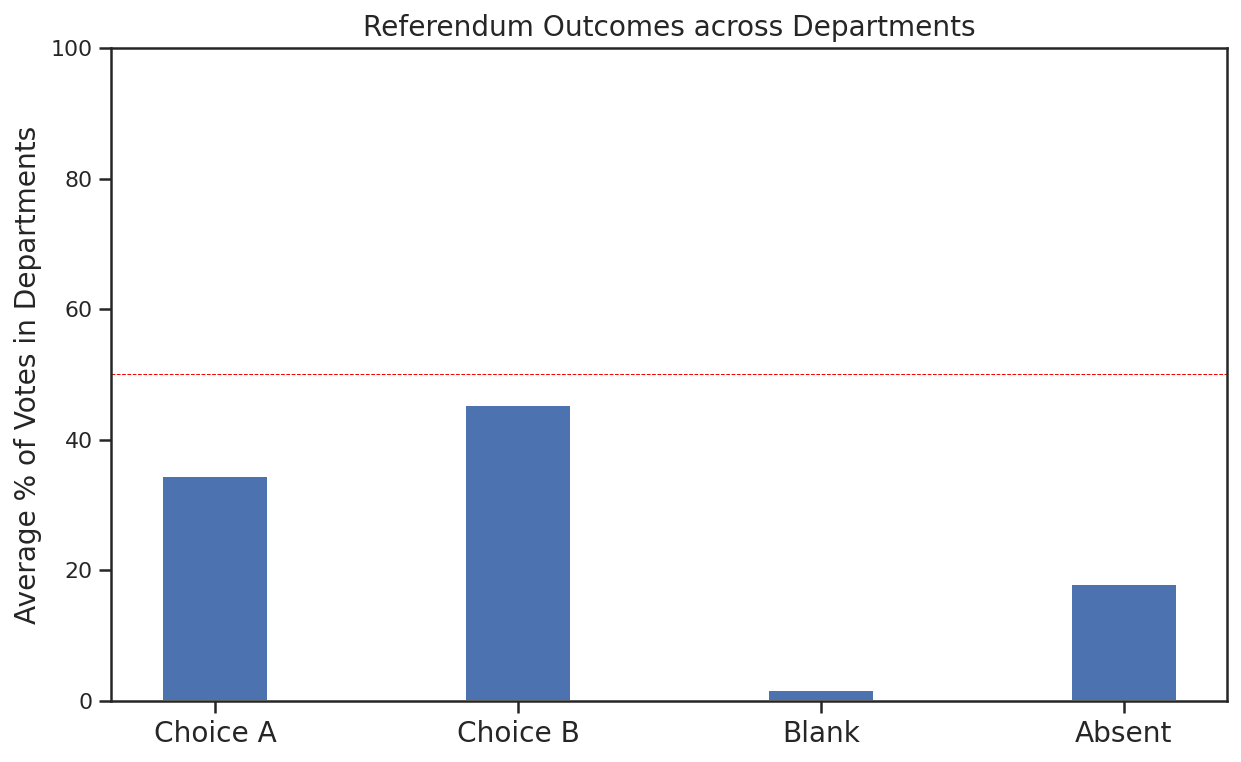

In [30]:
dep_pc = departments.copy()
for col in ["choice_a","choice_b","no_vote","absent"]:
    dep_pc[col] = 100.0*(dep_pc[col] / dep_pc["registered"])


labels = ["Choice A", 'Choice B', "Blank", "Absent"]
heights = [dep_pc["choice_a"].median() , dep_pc["choice_b"].median(), dep_pc["no_vote"].median(), dep_pc["absent"].median()]

#x = np.arange(len(labels)) 
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,6))

b1 = ax.bar(labels, heights, width);
ax.axhline(50.0, color="red", ls="--", lw=0.5);

#b1 = ax.bar(x - width/2.0, data_mod["choice_a"]., width, label='Choice A')
#b2 = ax.bar(x + width/2.0, dep_means["choice_b"], width, label='Choice B')

ax.set_title("Referendum Outcomes across Departments", fontsize =14)
ax.set_ylabel('Average % of Votes in Departments', fontsize=14);
ax.set_ylim(0,100);
ax.set_xticks(labels);
ax.set_xticklabels(labels, fontsize=14);

> It is certainly less decisive as even though **Choice B** dominates in most deparments, it still does not reach 50% of the votes on average. 

#### Creating categorial variable to represent department size 

We classify departments into 4 categories based on number of registered voters : 
* Label **1** : 0 - 100,000 voters
* Label **2** : 100,000 - 500,000 voters
* Label **3** : 500,000 - 1,000,000 voters
* Label **4** : greater than 1,000,000 voters

In [31]:
departments["pop_cat"] = pd.cut(departments["registered"], bins=[0., 1e5, 5e5, 1e6, np.inf],labels=[1, 2, 3, 4])
departments["pop_cat"].value_counts()

2    66
3    26
1     8
4     7
Name: pop_cat, dtype: int64

#### Distribution of departments based on size categories

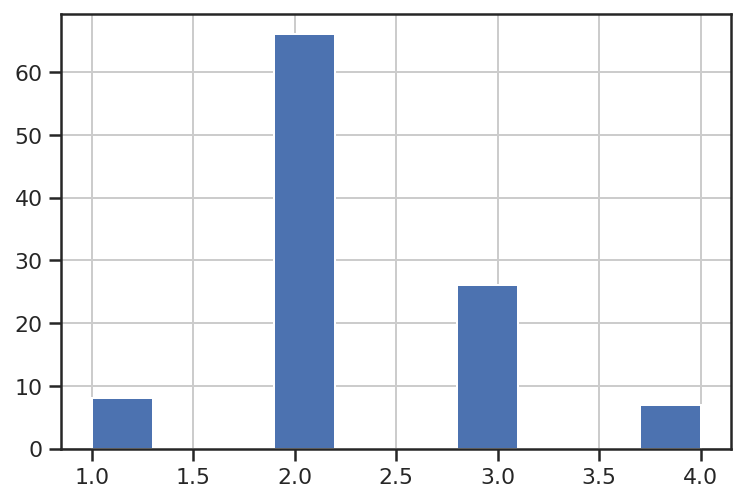

In [32]:
departments["pop_cat"].hist();

> We might have to keep this distribution in mind when sampling from random departments. 

#### Average number of referendum votes across departments of different size categories

In [33]:
col_list = ["choice_a", "choice_b"]

dep_pc = departments.copy()
for col in ["choice_a","choice_b","no_vote","absent"]:
    dep_pc[col] = 100.0*(dep_pc[col] / dep_pc["registered"])

dep_means = dep_pc.pivot_table(values=col_list, index="pop_cat" , aggfunc=np.mean)
dep_means

,choice_a,choice_b
pop_cat,,
1,29.419917,32.877871
2,34.445008,44.563778
3,34.017862,44.681837
4,32.973782,40.366996


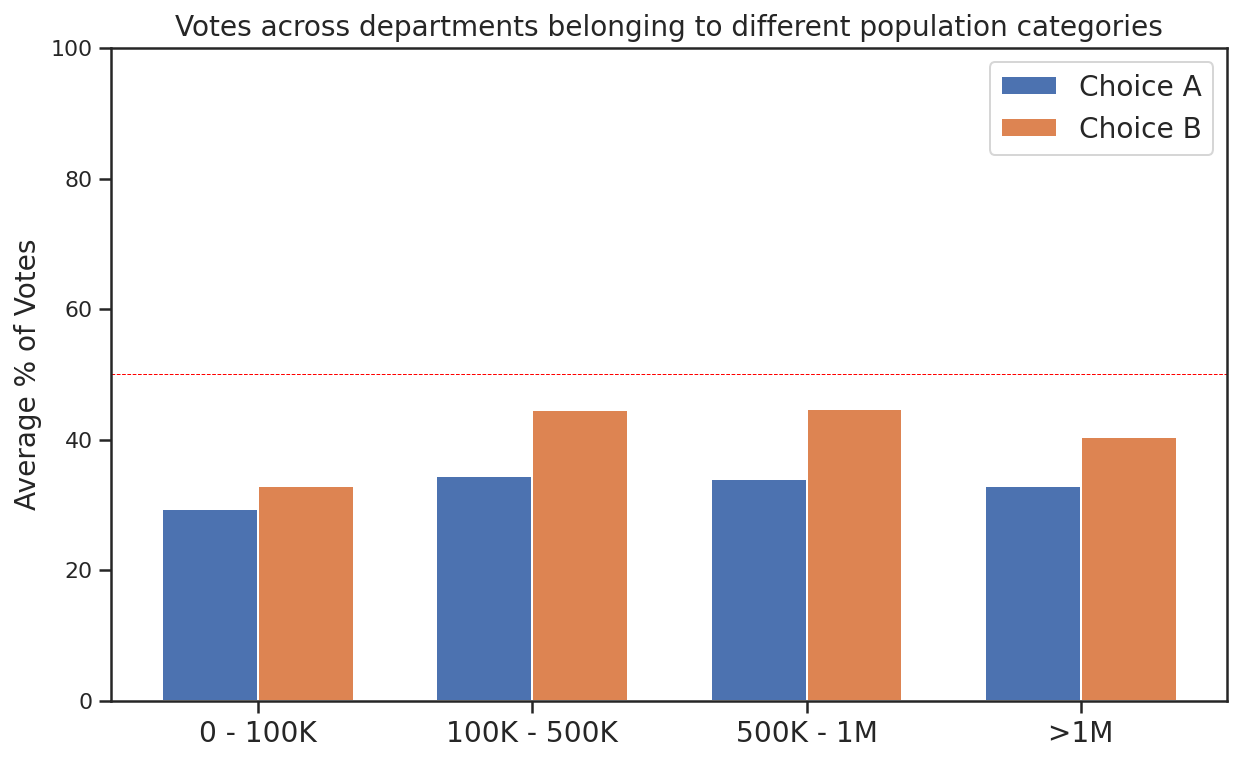

In [34]:
labels = ["0 - 100K", '100K - 500K', "500K - 1M", " >1M "]

x = np.arange(len(labels)) 
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,6))

b1 = ax.bar(x - width/2.0, dep_means["choice_a"], width, label='Choice A')
b2 = ax.bar(x + width/2.0, dep_means["choice_b"], width, label='Choice B')
ax.axhline(50.0, color="red", ls="--", lw=0.5);

ax.set_title("Votes across departments belonging to different population categories", fontsize =14)
ax.set_ylabel('Average % of Votes', fontsize=14);
ax.set_ylim(0,100);
ax.set_xticks(x);
ax.set_xticklabels(labels, fontsize=14);
#ax.set_xticklabels(labels = labels, fontsize=14);
ax.legend(fontsize=14);

> We observe there is a clear winner (**Choice B**) when considering different size categories of departments. For the smallest sized departments (0-100K voters), the difference between the referendum choices are not so clear. 

#### Distribution of percentage of votes across all departments for different "vote" types. 

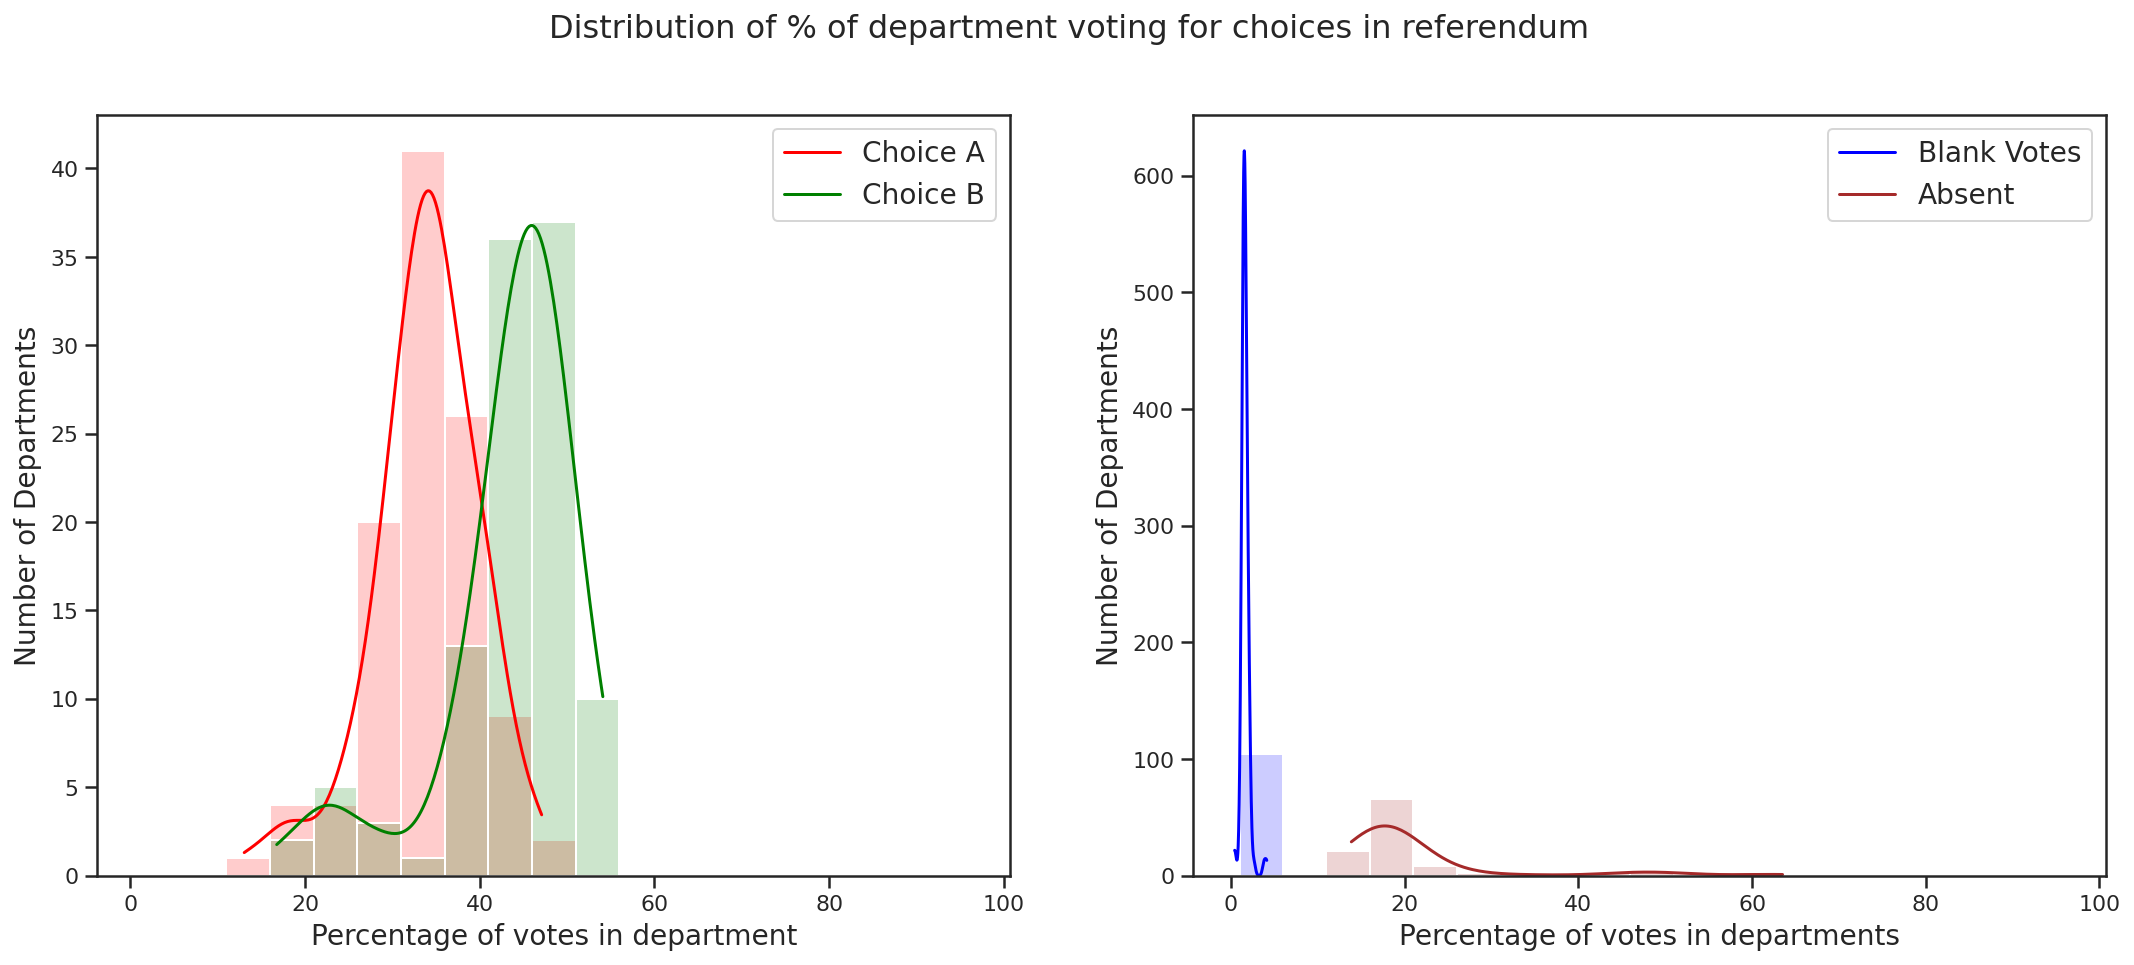

In [35]:
dep_pc = departments.copy()
for col in ["choice_a","choice_b","no_vote","absent"]:
    dep_pc[col] = 100.0*(dep_pc[col] / dep_pc["registered"])
    
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18,7));

sns.histplot(dep_pc, x="choice_a", bins=range(1, 100, 5), kde=True, legend=True, color="red", alpha=0.2, ax=ax1);
sns.histplot(dep_pc, x="choice_b", bins=range(1, 100, 5), kde=True, legend=True, color="green", alpha=0.2, ax=ax1);
ax1.legend(["Choice A", "Choice B"], fontsize=14);
ax1.set_xlabel("Percentage of votes in department", fontsize=14);
ax1.set_ylabel("Number of Departments", fontsize=14);

sns.histplot(dep_pc, x="no_vote", bins=range(1, 100, 5), kde=True, legend=True, color="blue", alpha=0.2, ax=ax2);
sns.histplot(dep_pc, x="absent", bins=range(1, 100, 5), kde=True, legend=True, color="brown", alpha=0.2, ax=ax2);
ax2.legend(["Blank Votes", "Absent"], fontsize=14);
ax2.set_xlabel("Percentage of votes in departments", fontsize=14);
ax2.set_ylabel("Number of Departments", fontsize=14);

fig.suptitle("Distribution of % of department voting for choices in referendum", fontsize=16);

> Compared to the distributions for communes, the department level distributions are narrower and skewed, not to mention the peaks being closer together. 

#### Adding **department** size information at **commune** level

In [36]:
data_new = data.copy()

data_new["dep_cat"] = 0

for dep in departments.index:
    mask = (data["dep_label"] == dep )
    data_new.loc[mask, "dep_cat"] = departments.loc[dep, "pop_cat"]

data_new.head()

,dep_code,dep_label,com_code,com_label,registered,absent,no_vote,choice_a,choice_b,dep_cat
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,2
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,2
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,2
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,2
4,1,AIN,6,Ambléon,105,17,1,35,52,2


#### Distribution of voting at commune level across different department size categories : **Choice A** 

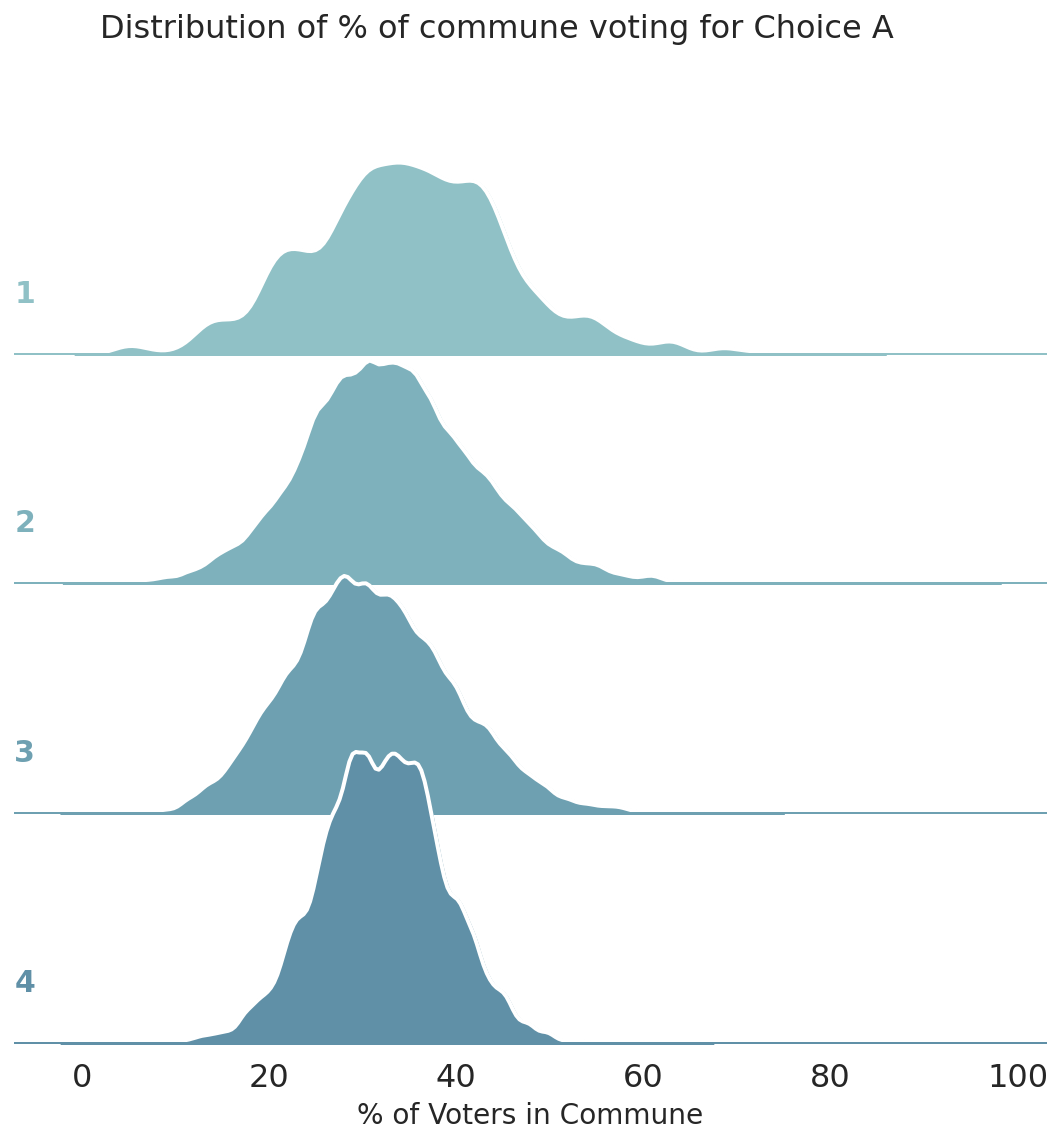

In [37]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

dep_pc = data_new.copy()
for col in ["choice_a","choice_b","no_vote","absent"]:
    dep_pc[col] = 100.0*(dep_pc[col] / dep_pc["registered"])


pal = sns.cubehelix_palette(10, rot=-.25, light=.7);
g = sns.FacetGrid(dep_pc, row="dep_cat", hue="dep_cat", aspect=4, height=2.0, palette=pal);

# Draw the densities in a few steps
g.map(sns.kdeplot, "choice_a",
      bw_adjust=.5, clip_on=True,
      fill=True, alpha=1, linewidth=1.5);
g.map(sns.kdeplot, "choice_a", clip_on=True, color="w", lw=2, bw_adjust=.5);
g.map(plt.axhline, y=0, lw=2, clip_on=True);


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca();
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=15);


g.map(label, "dep_cat");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);


# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
#g.set(xlim=(0.0,3.0));
plt.xlabel("% of Voters in Commune", fontsize=14);
plt.xticks(fontsize=16);
g.despine(bottom=True, left=True);
g.fig.suptitle("Distribution of % of commune voting for Choice A", fontsize=16);
#g.fig.savefig("./plots_paper/pdf_vs_time.pdf", dpi=200);

> We can clearly see that as we go towards **larger department sizes**, the distributions get narrower around the 35% result we saw before.  

#### Distribution of voting at commune level across different department size categories : **Choice B** 

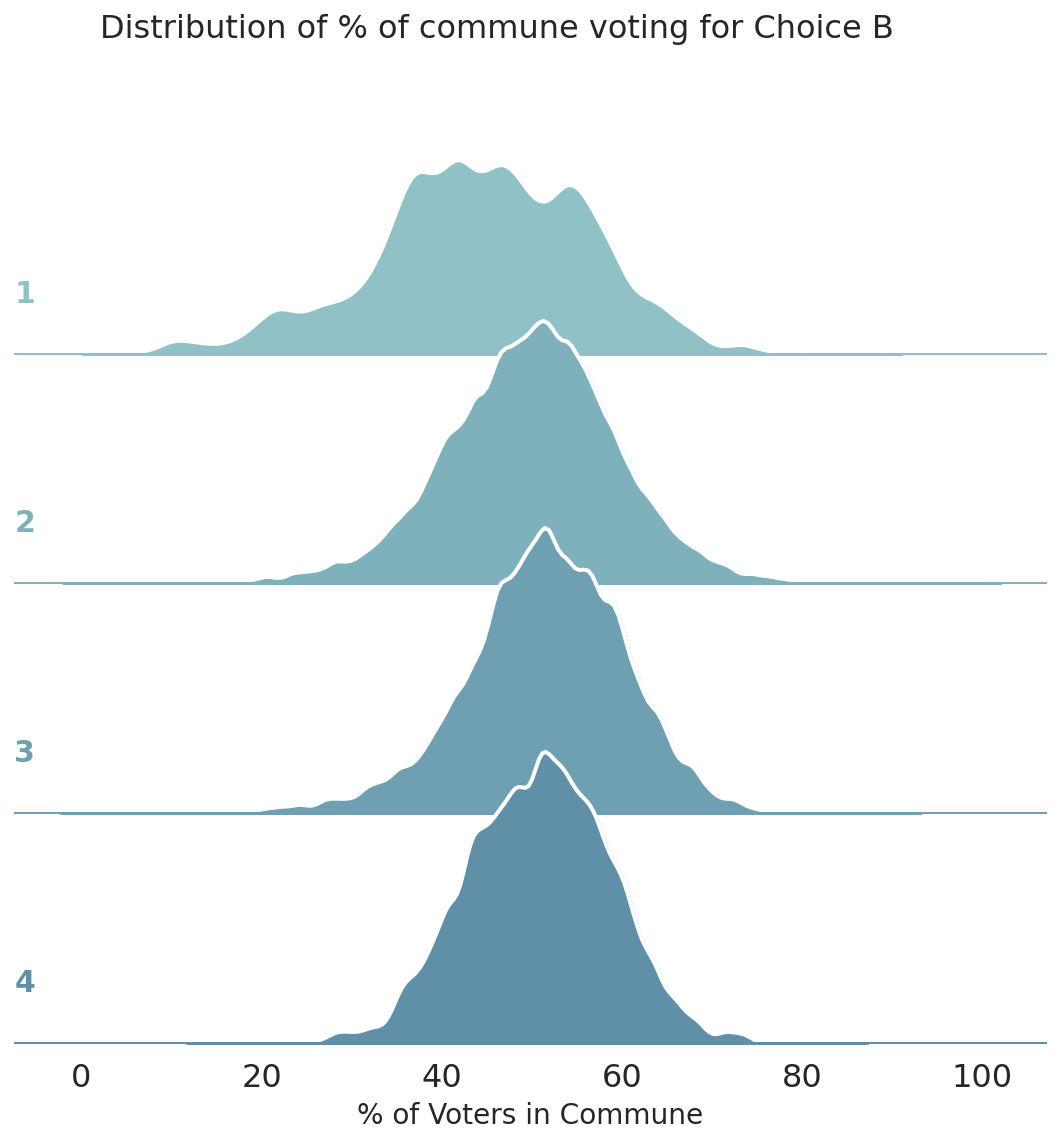

In [38]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

dep_pc = data_new.copy()
for col in ["choice_a","choice_b","no_vote","absent"]:
    dep_pc[col] = 100.0*(dep_pc[col] / dep_pc["registered"])


pal = sns.cubehelix_palette(10, rot=-.25, light=.7);
g = sns.FacetGrid(dep_pc, row="dep_cat", hue="dep_cat", aspect=4, height=2.0, palette=pal);

# Draw the densities in a few steps
g.map(sns.kdeplot, "choice_b",
      bw_adjust=.5, clip_on=True,
      fill=True, alpha=1, linewidth=1.5);
g.map(sns.kdeplot, "choice_b", clip_on=True, color="w", lw=2, bw_adjust=.5);
g.map(plt.axhline, y=0, lw=2, clip_on=True);


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca();
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=15);


g.map(label, "dep_cat");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);


# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
#g.set(xlim=(0.0,3.0));
plt.xlabel("% of Voters in Commune", fontsize=14);
plt.xticks(fontsize=16);
g.despine(bottom=True, left=True);
g.fig.suptitle("Distribution of % of commune voting for Choice B", fontsize=16);
#g.fig.savefig("./plots_paper/pdf_vs_time.pdf", dpi=200);

> The trend is similar to what we observed corresponding to **Choice A**, approaching the 50% mark as we move towards larger departments. 

---
---

## Predictive Modeling

We now try to rapidly prototype a predictive model using a standard machine learning algorithm.

### Problem definition 
We can use the original dataset to formulate a classification problem, where our objective is to predict the outcome of the referendum at the **commune** level corresponding to a given set of attributes. 

**Target variable** : A (Choice A wins), B (Choice B wins), N (no clear winner)

**Features** : 3 numerical attributes, 1 categorical
* Number of registered voters in commune
* Number of absent voters
* Number of blank votes
* Size of deparment to which commune belongs

#### Populating outcome column

In [39]:
for col in ["choice_a","choice_b","no_vote","absent"]:
    data_new[col] = 100.0*(data_new[col] / data_new["registered"])

data_new["outcome"] = "N" 

# creating boolean masks for choosing if A or B won the referendum

mask_A = (data_new["choice_a"] > (data_new["choice_b"] + data_new["no_vote"] + data_new["absent"]))
mask_B = (data_new["choice_b"] > (data_new["choice_a"] + data_new["no_vote"] + data_new["absent"]))

#mask_A = ( data_mod["choice_a"] > 50.0 )
#mask_B = ( data_mod["choice_b"] > 50.0 )

# Replacing N with winners A or B
data_new.loc[mask_A , "outcome"] = "A"
data_new.loc[mask_B , "outcome"] = "B"

#### Selecting only revelant attributes from dataset

In [40]:
col_list = ["registered", "dep_cat", "no_vote", "absent", "outcome"]
referendum = data_new[col_list].copy()
referendum.head()

,registered,dep_cat,no_vote,absent,outcome
0,592,2,1.520270,14.189189,B
1,215,2,2.325581,16.744186,B
2,8205,2,1.535649,20.694698,N
3,1152,2,1.562500,14.756944,B
4,105,2,0.952381,16.190476,N


### Splitting the dataset

Taking into consideration of the size disparities within the communes, it is better to opt for *stratified* random sampling of the rows, instead of simple random sampling. Having the right number of instances sampled from each stratum (based on commune size) will guarantee that the test set is representative of the overall population. 

#### Creating categorical column representing commune size
We classify communes into 3 categories based on number of registered voters : 
* Label **1** : 0 - 1000 voters
* Label **2** : 1000 - 1,000,000 voters
* Label **3** : greater than 1,000,000 voters

In [41]:
referendum["com_cat"] = pd.cut(referendum["registered"], bins=[0., 1e3, 1e6, np.inf], labels=[1, 2, 3])
referendum["com_cat"].value_counts() #/ len(referendum)

1    29278
2     7512
3        1
Name: com_cat, dtype: int64

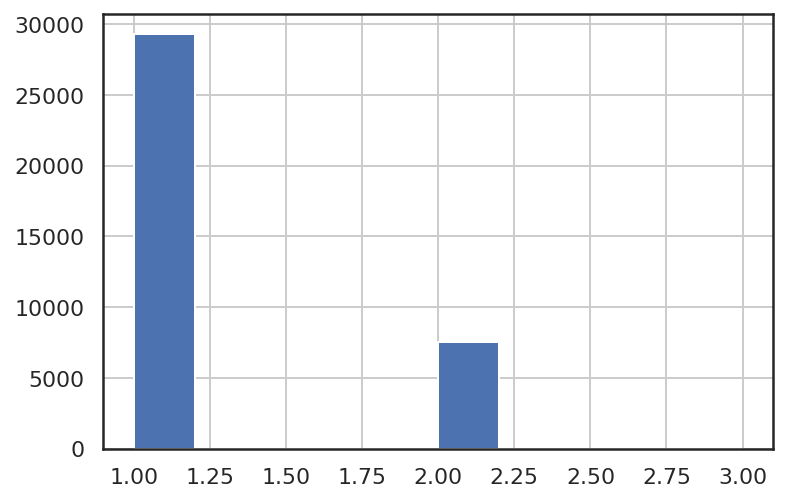

In [42]:
referendum["com_cat"].hist();

> We see that the current choice of stratification is not ideal (only 1 commune in the 3rd stratum). 

#### Removing the extreme outlier **Paris**

In [43]:
referendum.loc[referendum["registered"] > 1e6]

,registered,dep_cat,no_vote,absent,outcome,com_cat
30795,1253322,4,0.964876,19.847653,N,3


#### Selecting a different stratification

We re-classify communes into 3 categories based on number of registered voters : 
* Label **1** : 0 - 1000 voters
* Label **2** : 1000 - 10,000 voters
* Label **3** : 10,000 - 100,000 voters
* Label **4** : greater than 100,000 voters

In [44]:
referendum = referendum.loc[ ~(referendum["registered"] > 1e6)]

referendum["com_cat"] = pd.cut(referendum["registered"], bins=[0., 1e3, 1e4, 1e5, np.inf], labels=[1, 2, 3, 4])
referendum["com_cat"].value_counts()

1    29278
2     6861
3      637
4       14
Name: com_cat, dtype: int64

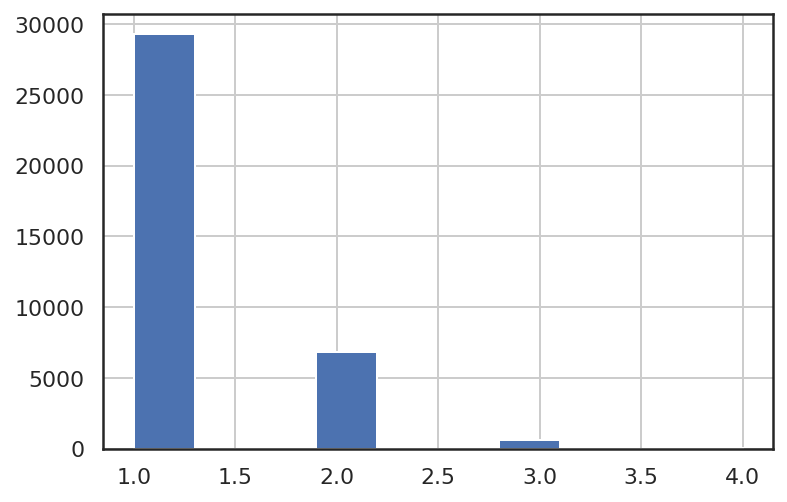

In [45]:
referendum["com_cat"].hist();

> This stratification seems much better, as we have atleast 14 instances in the last category. 

#### Stratified Random Sampling : holding out 20% for testing

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

for train_index, test_index in split.split(referendum, referendum["com_cat"]):
    ref_train = referendum.iloc[train_index]
    ref_test = referendum.iloc[test_index]

ref_train["com_cat"].value_counts() #/ len(ref_train)

1    23422
2     5489
3      510
4       11
Name: com_cat, dtype: int64

#### Dropping the categorical column from both training and testing sets

In [47]:
for set_ in (ref_train, ref_test):
    set_.drop("com_cat", axis=1, inplace=True)

ref_train.head()

,registered,dep_cat,no_vote,absent,outcome
31182,525,3,0.952381,9.904762,N
30787,673,3,1.485884,20.505201,N
22986,444,2,1.801802,10.135135,B
8158,2174,2,1.471941,15.225391,N
31870,301,3,0.332226,16.279070,B


### Data Preparation

We need to rescale the numerical attributes in the training set in order to use our machine learning model. We use a simple *standardization* method to re-scale the numerical attributes, whereas for the categorical attributes we use a *one-hot encoder*. 

#### Dividing the training set to features and labels

In [48]:
ref_tr = ref_train.drop("outcome", axis=1)
ref_tr_labels = ref_train["outcome"].copy()

#### Feature scaling using tranformation pipelines

In [49]:
ref_tr_num = ref_tr.drop("dep_cat", axis=1)
#ref_cat = ref["dep_cat"].copy()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([("scaling",StandardScaler())])

num_attribs = list(ref_tr_num)
cat_attribs = ["dep_cat"]

full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs) , 
                                   ("cat", OneHotEncoder(), cat_attribs) ])

ref_tr_prepared = full_pipeline.fit_transform(ref_tr)

### Model Training and Evaluation

We train our model, evaluate on the training set, and check the generalization error using the test set. 

#### Training Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, random_state=2)
forest.fit(ref_tr_prepared, ref_tr_labels)

RandomForestClassifier(n_estimators=50, random_state=2)

#### Evaluation on **training** set

In [51]:
ref_tr_predict = forest.predict(ref_tr_prepared)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(ref_tr_labels,ref_tr_predict))
print("Confusion Matrix\n")
print(classification_report(ref_tr_labels,ref_tr_predict))
print("\n")
print("Classification Accuracy = {}".format(accuracy_score(ref_tr_labels, ref_tr_predict)))

Confusion Matrix

              precision    recall  f1-score   support

           A       0.93      0.85      0.89      1102
           B       0.97      0.98      0.97     15447
           N       0.97      0.97      0.97     12883

    accuracy                           0.97     29432
   macro avg       0.96      0.93      0.94     29432
weighted avg       0.97      0.97      0.97     29432



Classification Accuracy = 0.9690812720848057


#### Preparing test set

In [52]:
ref_ts = ref_test.drop("outcome", axis=1)
ref_ts_labels = ref_test["outcome"].copy()

ref_ts_prepared = full_pipeline.transform(ref_ts)

#### Evaluation on **test** set

In [53]:
ref_ts_predict = forest.predict(ref_ts_prepared)

print("Confusion Matrix\n")
print(classification_report(ref_ts_labels,ref_ts_predict))
print("\n")
print("Classification Accuracy = {}".format(accuracy_score(ref_ts_labels, ref_ts_predict)))

Confusion Matrix

              precision    recall  f1-score   support

           A       0.08      0.03      0.04       278
           B       0.59      0.66      0.62      3841
           N       0.55      0.50      0.52      3239

    accuracy                           0.57      7358
   macro avg       0.41      0.40      0.40      7358
weighted avg       0.55      0.57      0.56      7358



Classification Accuracy = 0.566050557216635


> There is a sharp drop in the classification accuracy of the model when we evaluate on the test set, which indicates that our model has been overfit to the training data. 

#### How to get a better model ? 
There are many possible ways in which we can reduce the generalization error of our model, some immediately apparent ones are - 
* Choose a better set of attributes (verify feature importance).
* Take logarithms of the highly skewed attributes.
* Conduct cross validation using multiple folds on training set. 
* Determine optimal set of hyper-parameters using a grid search over the space of hyper-parameters. 
* Maybe try other models ? 